In [1]:
import pandas as pd
import os
os.chdir('D:\Documents')
os.getcwd()

'D:\\Documents'

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [6]:
kmeans.inertia_

183653.3289473684

In [11]:
#we have to idetify n_clusters to check where it is flattening
# hence create a loop
wcss=[]
for i in range(1,11):
    val=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    wcss=kmeans.inertia_
    wcss.append(val)

AttributeError: 'float' object has no attribute 'append'

In [12]:
#we have to identify n_clusters to check where it is flattening
# hence create a loop
wcss = []  # Initialize as empty list
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)  # Create KMeans object with i clusters
    kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])  # Fit the model
    wcss.append(kmeans.inertia_)  # Append the inertia_ value to wcss list
    
# Now wcss contains inertia values for different numbers of clusters

In [13]:
wcss

[269981.28,
 183069.17582751293,
 106348.37306211119,
 73679.78903948834,
 67617.67721783047,
 37442.24745037571,
 34659.08134980962,
 26686.83778518778,
 27294.597682838845,
 21728.624971519712]

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

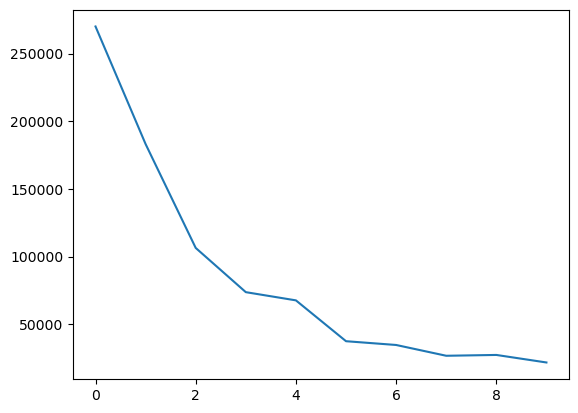

In [18]:
plt.plot(wcss)

In [19]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)
kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

KMeans(n_clusters=5)

In [20]:
clusters=kmeans.predict(df[['Annual Income (k$)','Spending Score (1-100)']])
clusters

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

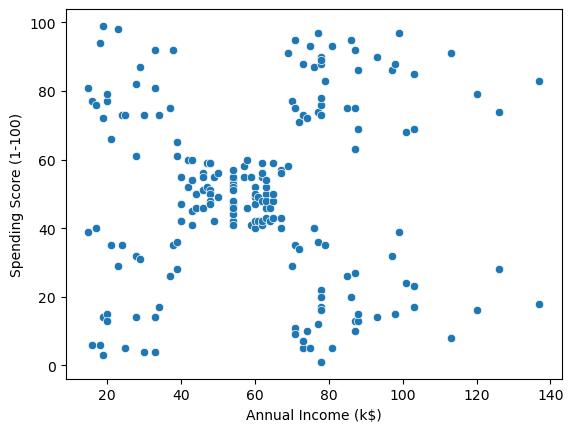

In [26]:
# Corrected code
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
# The error was fixed by explicitly naming the x and y parameters
# This avoids the ambiguity that caused the "multiple values for argument 'data'" error

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

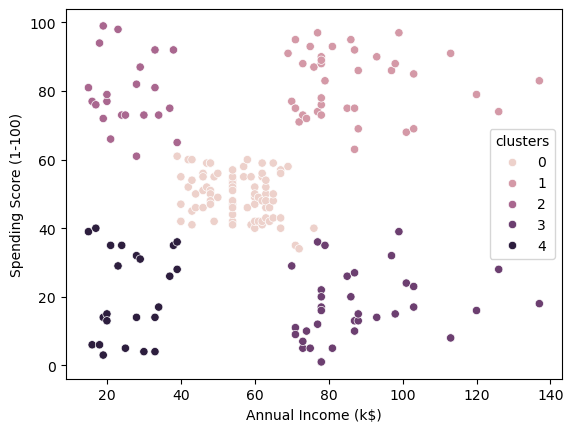

In [28]:
# First, make sure you have a 'clusters' column in your dataframe
# If you're using clustering algorithms, you need to assign cluster labels first
# For example, if using KMeans:
from sklearn.cluster import KMeans

# Assuming df has the features you want to cluster
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust number of clusters as needed
df['clusters'] = kmeans.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Now the plot will work because 'clusters' exists in the dataframe
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='clusters')
# If you don't want to create clusters, you can use an existing column instead
# For example: hue='Gender' or another categorical column that exists in your dataframe